In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load the data
df = pd.read_csv('C:/VSProjects/Credit_Scoring/dataset/cs-training.csv')


In [15]:
# 2. Handle missing values
df.replace('NA', np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# 3. Initial Data Analysis and Distribution Plots
print(f"Dataset shape: {df.shape}")
df.info()
df.describe()

Dataset shape: (150000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  15

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


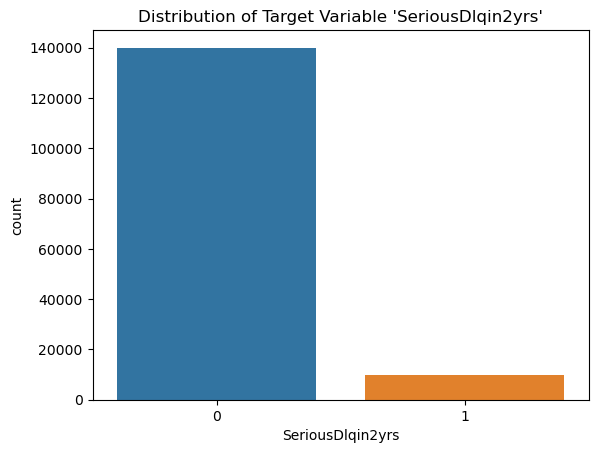

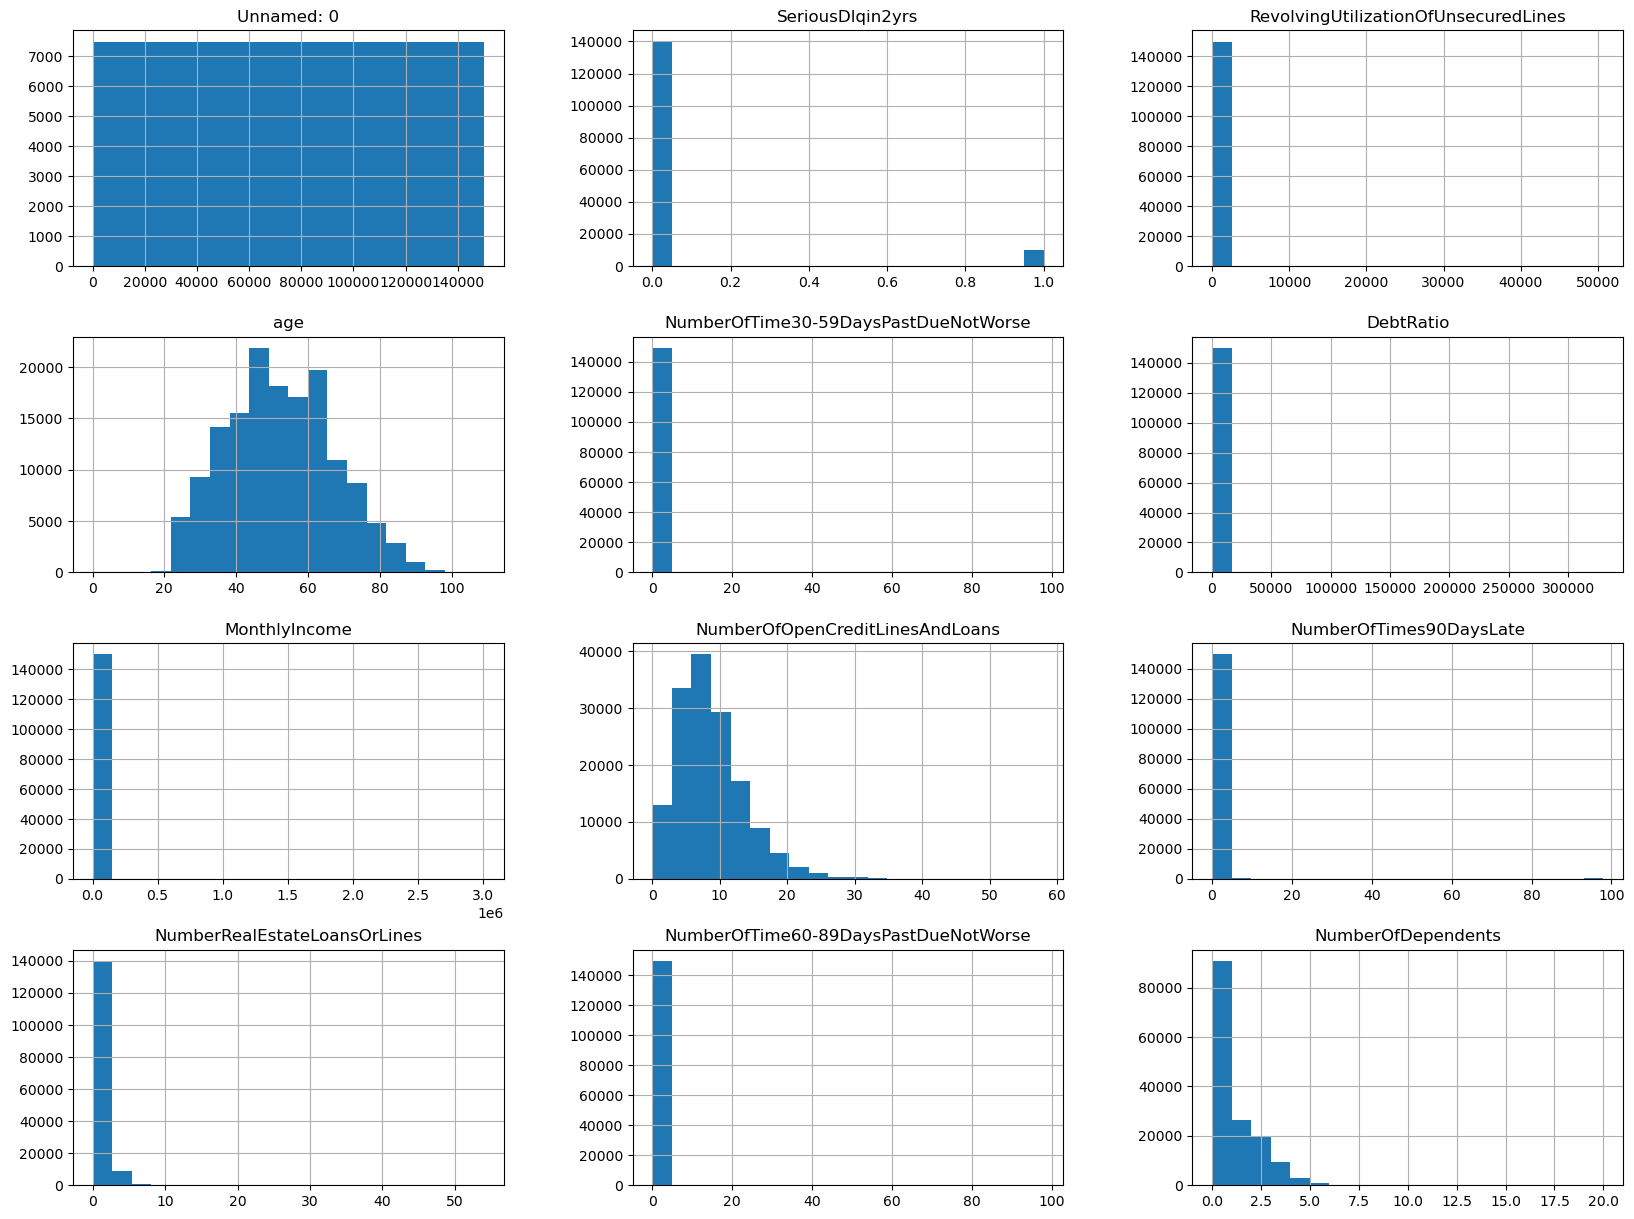

"\nplt.figure(figsize=(12, 8))\nsns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')\nplt.title('Correlation Matrix')\nplt.show()\n"

In [16]:
# Target Variable Distribution
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title("Distribution of Target Variable 'SeriousDlqin2yrs'")
plt.show()

# Feature Distribution and Correlation Matrix
df.hist(bins=20, figsize=(20, 15))
plt.show()

'''
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
'''

In [17]:
# 4. Split the dataset into features (X) and target (y)
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# 6. Define a function for pipeline creation, model training, and evaluation
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="median")),
        ('classifier', model)
    ])

def evaluate_model(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))     

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [19]:
# 7. Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'SVM': SVC(probability=True)
}


Training and Evaluating Logistic Regression...
Accuracy: 0.9338
ROC AUC: 0.6512
Precision: 0.5000
Recall: 0.0117
F1 Score: 0.0230

Confusion Matrix:


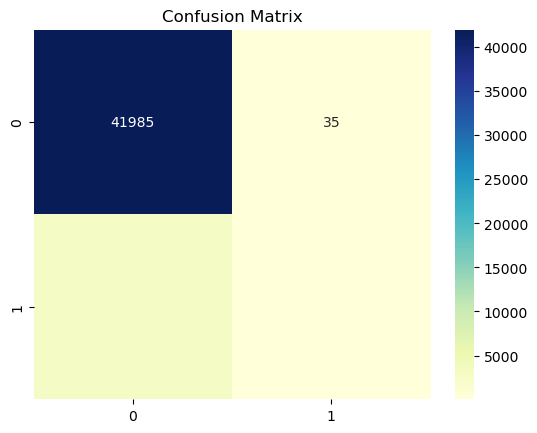


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     42020
           1       0.50      0.01      0.02      2980

    accuracy                           0.93     45000
   macro avg       0.72      0.51      0.49     45000
weighted avg       0.91      0.93      0.90     45000


Feature Importance:


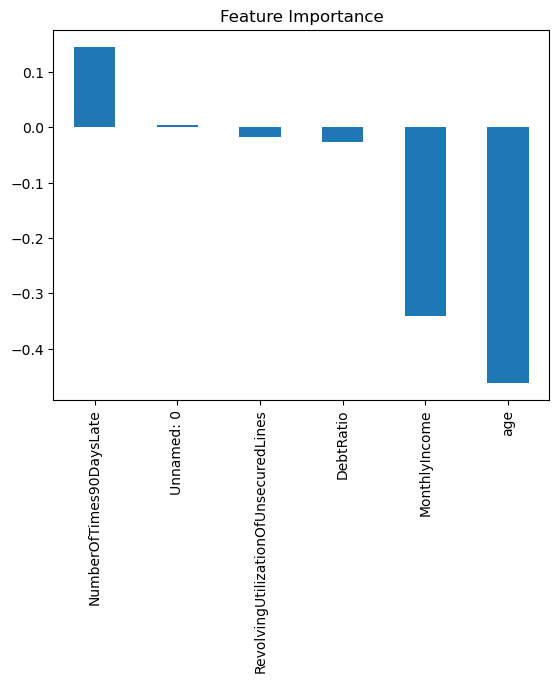

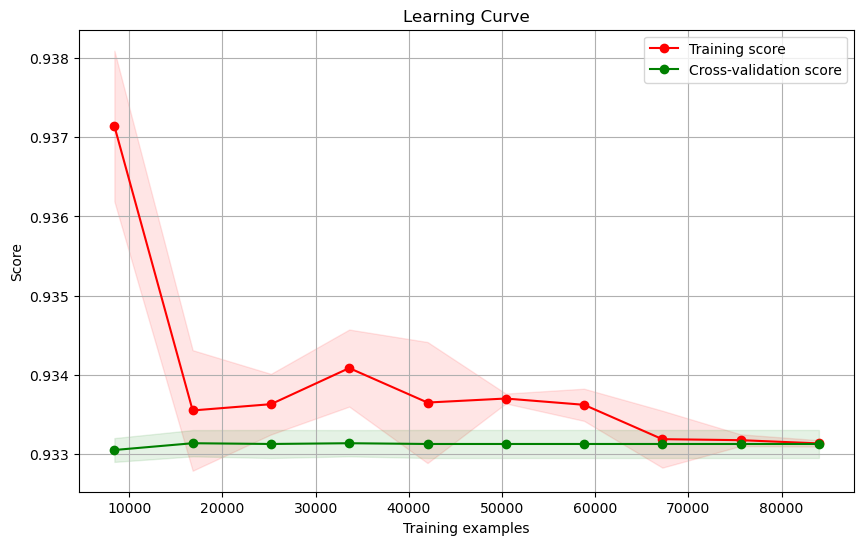


Training and Evaluating Decision Tree...
Accuracy: 0.8951
ROC AUC: 0.5951
Precision: 0.2302
Recall: 0.2493
F1 Score: 0.2394

Confusion Matrix:


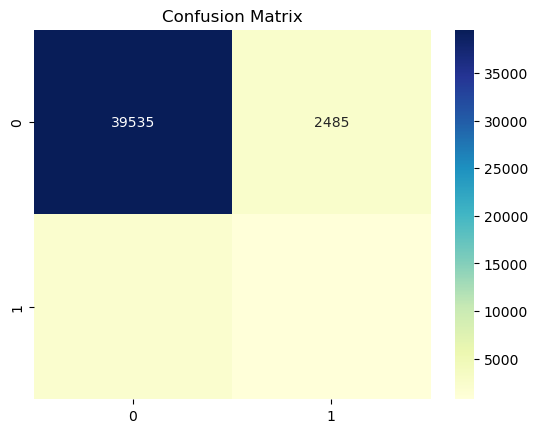


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     42020
           1       0.23      0.25      0.24      2980

    accuracy                           0.90     45000
   macro avg       0.59      0.60      0.59     45000
weighted avg       0.90      0.90      0.90     45000


Feature Importance:


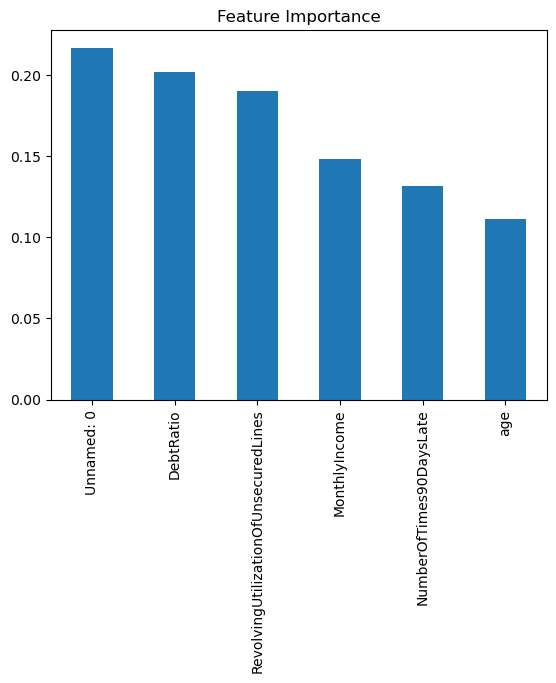

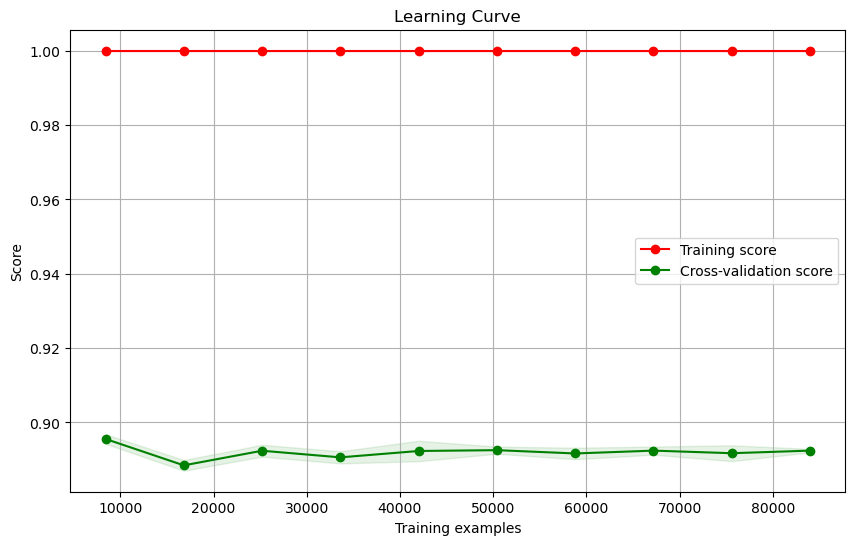


Training and Evaluating Random Forest...
Accuracy: 0.9361
ROC AUC: 0.8063
Precision: 0.5610
Recall: 0.1621
F1 Score: 0.2515

Confusion Matrix:


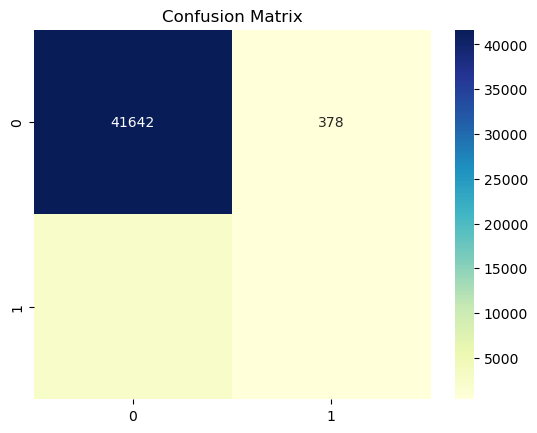


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     42020
           1       0.56      0.16      0.25      2980

    accuracy                           0.94     45000
   macro avg       0.75      0.58      0.61     45000
weighted avg       0.92      0.94      0.92     45000


Feature Importance:


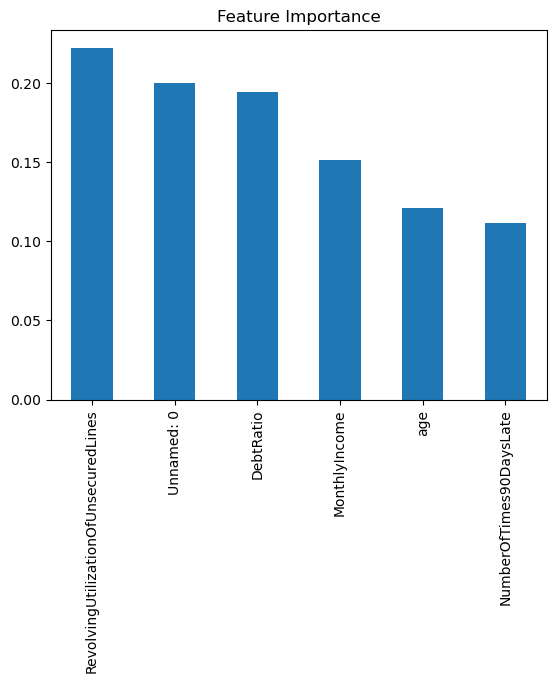

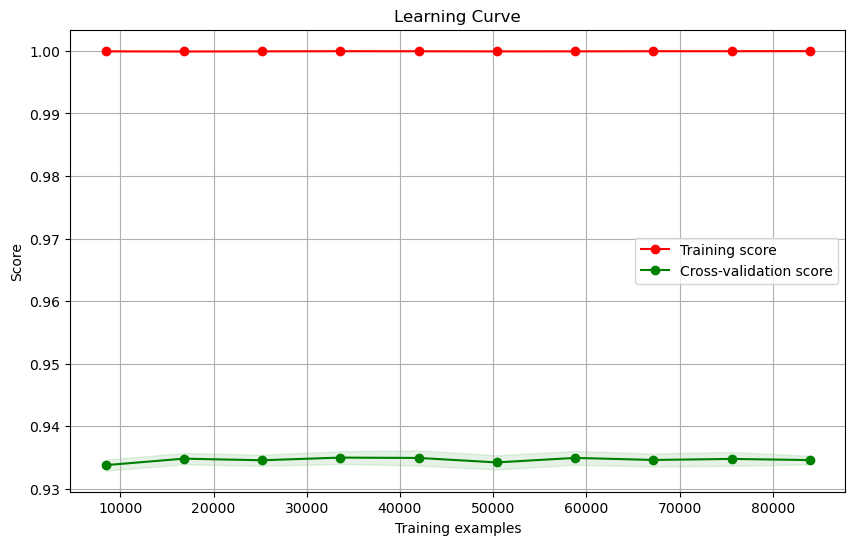


Training and Evaluating Gradient Boosting...
Accuracy: 0.9364
ROC AUC: 0.8342
Precision: 0.5794
Recall: 0.1433
F1 Score: 0.2298

Confusion Matrix:


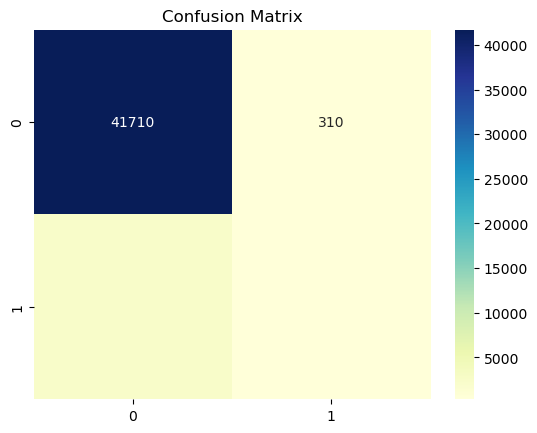


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     42020
           1       0.58      0.14      0.23      2980

    accuracy                           0.94     45000
   macro avg       0.76      0.57      0.60     45000
weighted avg       0.92      0.94      0.92     45000


Feature Importance:


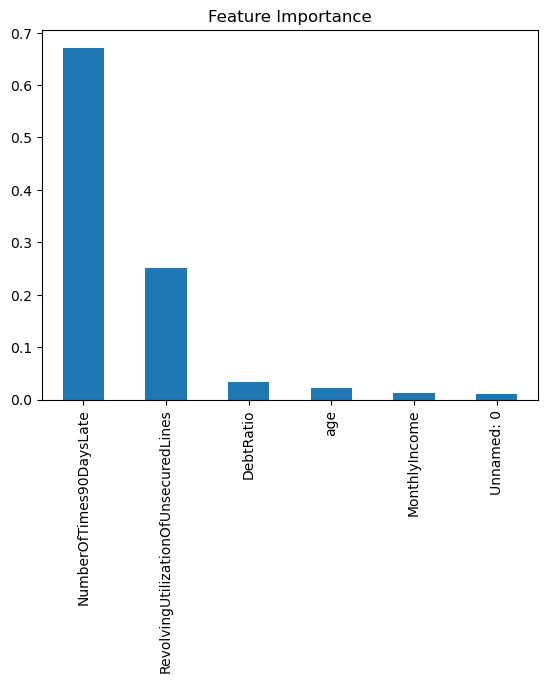

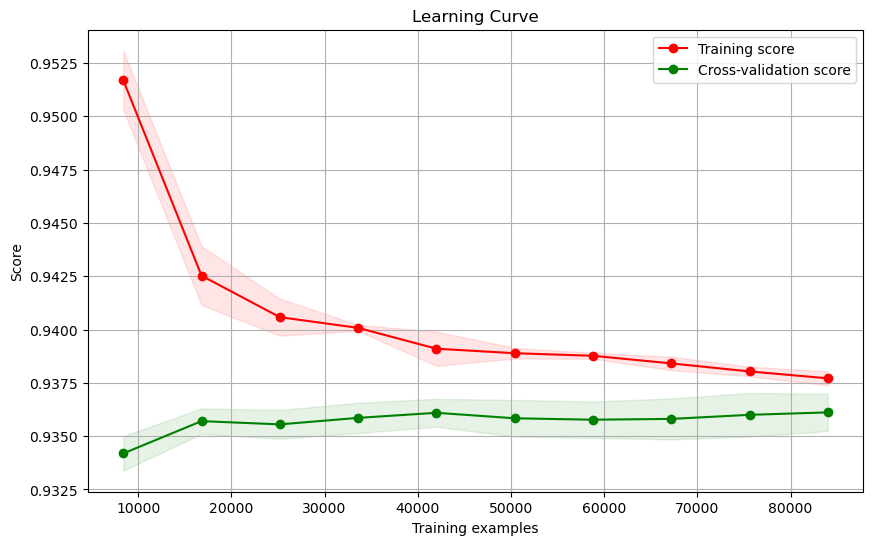


Training and Evaluating SVM...
Accuracy: 0.9348
ROC AUC: 0.5865
Precision: 0.6420
Recall: 0.0349
F1 Score: 0.0662

Confusion Matrix:


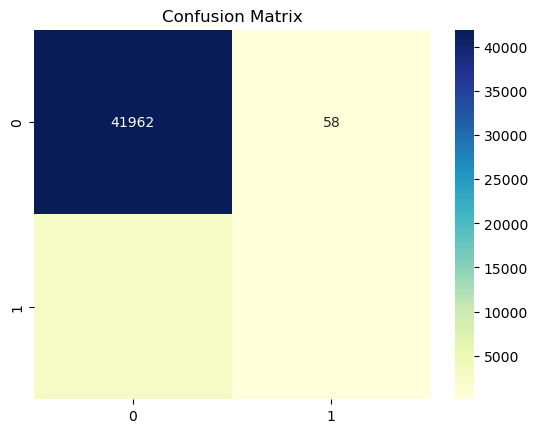


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42020
           1       0.64      0.03      0.07      2980

    accuracy                           0.93     45000
   macro avg       0.79      0.52      0.52     45000
weighted avg       0.92      0.93      0.91     45000



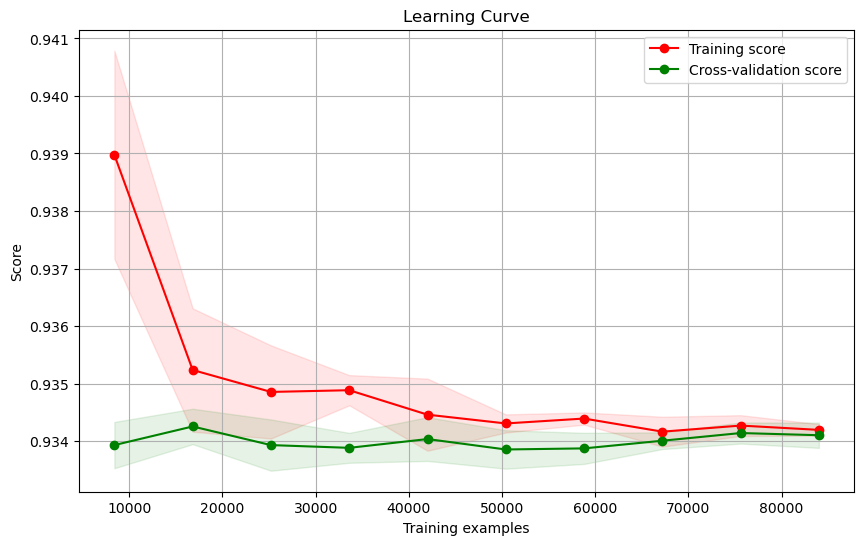

In [20]:
for model_name, model in models.items():
    print(f"\nTraining and Evaluating {model_name}...")
    
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    evaluate_model(y_test, y_pred, y_pred_prob)
    
    # Feature Importance (if applicable)
    if hasattr(model, 'coef_') or hasattr(model, 'feature_importances_'):
        print("\nFeature Importance:")
        # Extract selected feature names
        selected_features = pipeline.named_steps['feature_selection'].get_support(indices=True)
        selected_columns = X.columns[selected_features]
        
        if hasattr(model, 'coef_'):
            feature_importance = pd.Series(model.coef_[0], index=selected_columns)
        else:
            feature_importance = pd.Series(model.feature_importances_, index=selected_columns)
        
        feature_importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
        plt.show()
    
    # Learning Curve for Overfitting Check
    plot_learning_curve(pipeline, X_train, y_train)


In [21]:
# 8. Cross-Validation
print("\nCross-Validation Results:")
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
    print(f"{model_name} Average ROC AUC: {scores.mean():.4f}")

# 9. Final Feature Importance and Selection for Random Forest
print("\nFinal Feature Selection Using Random Forest:")
final_model = RandomForestClassifier(n_estimators=100)
final_pipeline = create_pipeline(final_model)
final_pipeline.fit(X_train, y_train)

if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.Series(final_model.feature_importances_, index=X.columns)
    selected_features = feature_importance[feature_importance > np.median(feature_importance)].index
    print("Selected Features:")
    print(selected_features)

    # Feature Importance Plot
    feature_importance.sort_values(ascending=False).plot(kind='bar', title="Final Feature Importance")
    plt.show()

# Train a model again with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

final_model.fit(X_train_selected, y_train)
y_pred_selected = final_model.predict(X_test_selected)
y_pred_prob_selected = final_model.predict_proba(X_test_selected)[:, 1]

print("\nEvaluation After Feature Selection:")
evaluate_model(y_test, y_pred_selected, y_pred_prob_selected)


Cross-Validation Results:
Logistic Regression Average ROC AUC: 0.6562
Decision Tree Average ROC AUC: 0.5546
Random Forest Average ROC AUC: 0.7272
Gradient Boosting Average ROC AUC: 0.7338
